### Notebook for the integration benchmark with the `scIB` package for stem cells labels predicted with `scArches-SCANVI` workflow

- **Developed by:** Anna Maguza
- **Institute of Computational Biology - Computational Health Department - Helmholtz Munich**
- 21st April 2022

### Load required modules

In [3]:
from scvi_colab import install

In [6]:
import anndata as an
import scanpy as sc
from rich import print
import scib
import scib.metrics

In [8]:
from scib_metrics.benchmark import Benchmarker

In [9]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                         9.5.0
absl                        NA
appnope                     0.1.2
asttokens                   NA
backcall                    0.2.0
chex                        0.1.7
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
deprecated                  1.2.13
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.4
importlib_resources         NA
ipykernel                   6.19.2
jax                         0.4.8
jaxlib                      0.4.7
jedi                        0.18.1
joblib                      1.2.0
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite                    0.39.1
matplotlib                  3.7.1
ml_dtypes                   0.1.0
mpl_toolkits                NA
natsort  

/Users/anna.maguza/miniconda3/envs/scib_env2/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


# scArches + SCANVI

#### 3000 HVGs

In [10]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scarches/stem_cells_diversity_3K_Sample_batch.h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scarches/stem_cells_diversity_3K_Sample_batch_output.h5ad'
adata = sc.read_h5ad(input)

In [11]:
adata

AnnData object with n_obs × n_vars = 31298 × 3000
    obs: 'cell_type', 'Location', 'batch', 'Sample_ID', 'n_genes', 'n_counts', 'Chem', 'Site', 'Type', 'Donor_ID', 'Layer', 'Celltype', 'sex', 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'disease', 'disease__ontology_label', 'Study_name', 'UniqueCell_ID', 'CellType', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Gender', 'n_genes_by_counts', 'total_counts_mt', 'doublet_scores', 'predicted_doublets', 'Age_group', 'total_counts_ribo', 'percent_mito', 'percent_ribo', 'Cell States', 'Cell Label', 'dataset', '_scvi_batch', '_scvi_labels', 'predictions'
    var: 'gene_id-reference', 'gene_name-reference', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    obsm: 'sca_SCANVI'

In [12]:
bm = Benchmarker(
    adata,
    batch_key="Sample_ID",
    label_key="predictions",
    embedding_obsm_keys=["X_pca", "sca_SCANVI"],
    n_jobs=-1,
)
bm.benchmark()

computing PCA
    with n_comps=50
    finished (0:00:16)


Computing neighbors:   0%|          | 0/2 [00:00<?, ?it/s]/Users/anna.maguza/miniconda3/envs/scib_env2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Embeddings: 100%|██████████| 2/2 [02:27<00:00, 73.59s/it] 


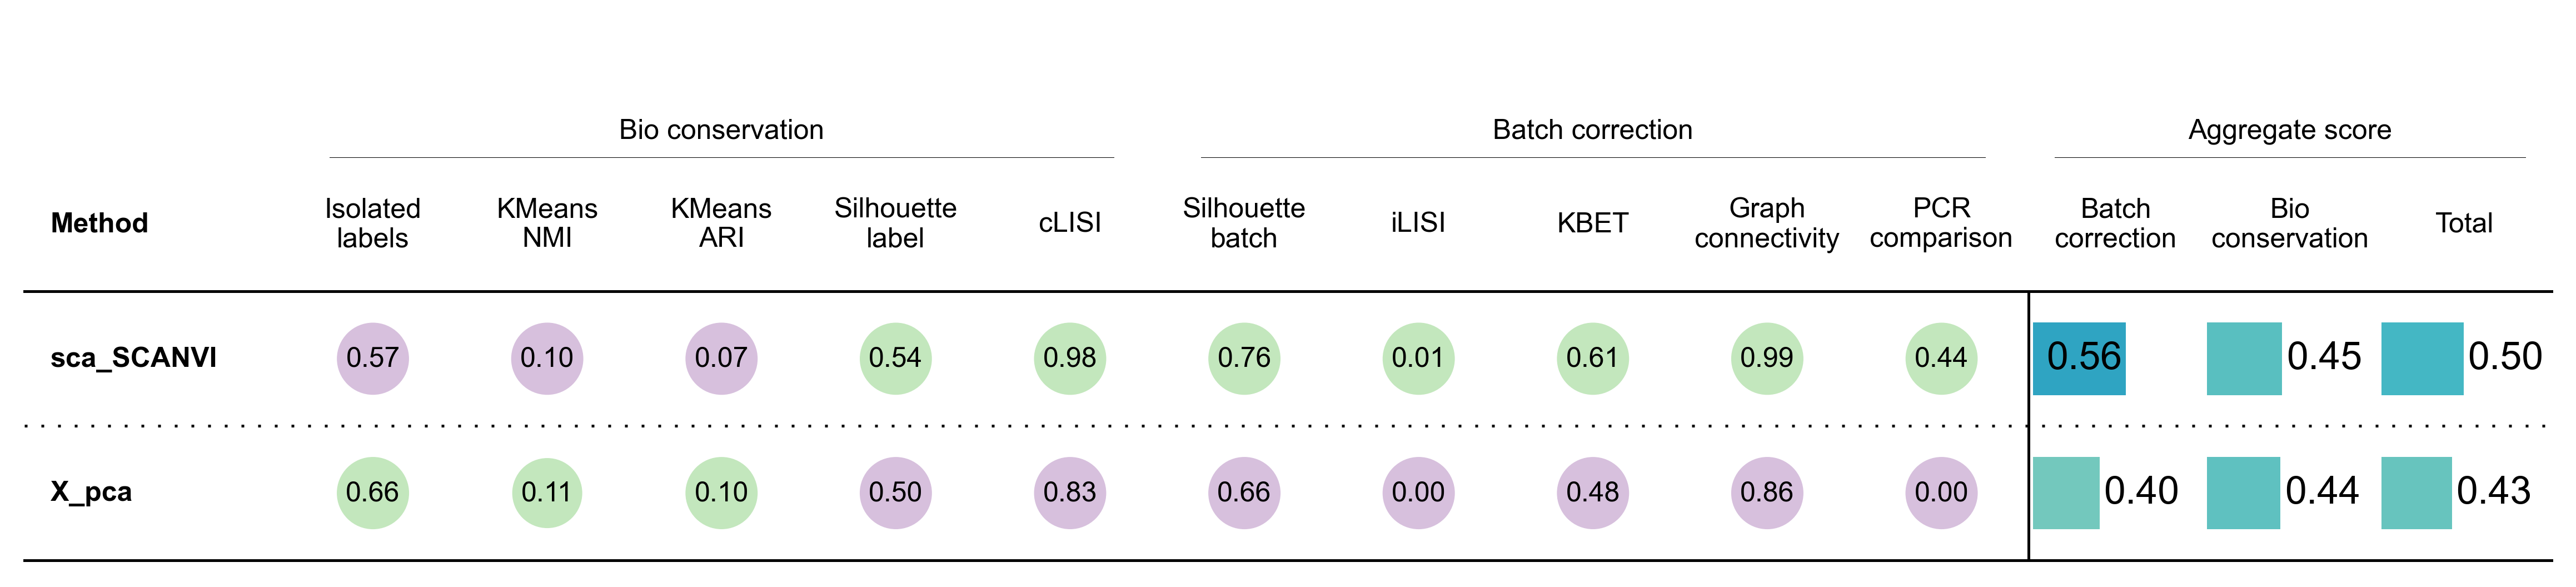

In [13]:
bm.plot_results_table(min_max_scale=False)

# scNym

#### 3000 HVGs

In [15]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scNYM/scnym_output_3K.h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scNYM/scnym_output_3K_output.h5ad'
adata = sc.read_h5ad(input)

In [18]:
bm = Benchmarker(
    adata,
    batch_key="Sample_ID",
    label_key="scNym",
    embedding_obsm_keys=["X_pca", 'X_scnym', 'X_umap'],
    n_jobs=-1,
)
bm.benchmark()

computing PCA
    with n_comps=50
    finished (0:00:07)


Embeddings: 100%|██████████| 3/3 [12:14<00:00, 244.92s/it]


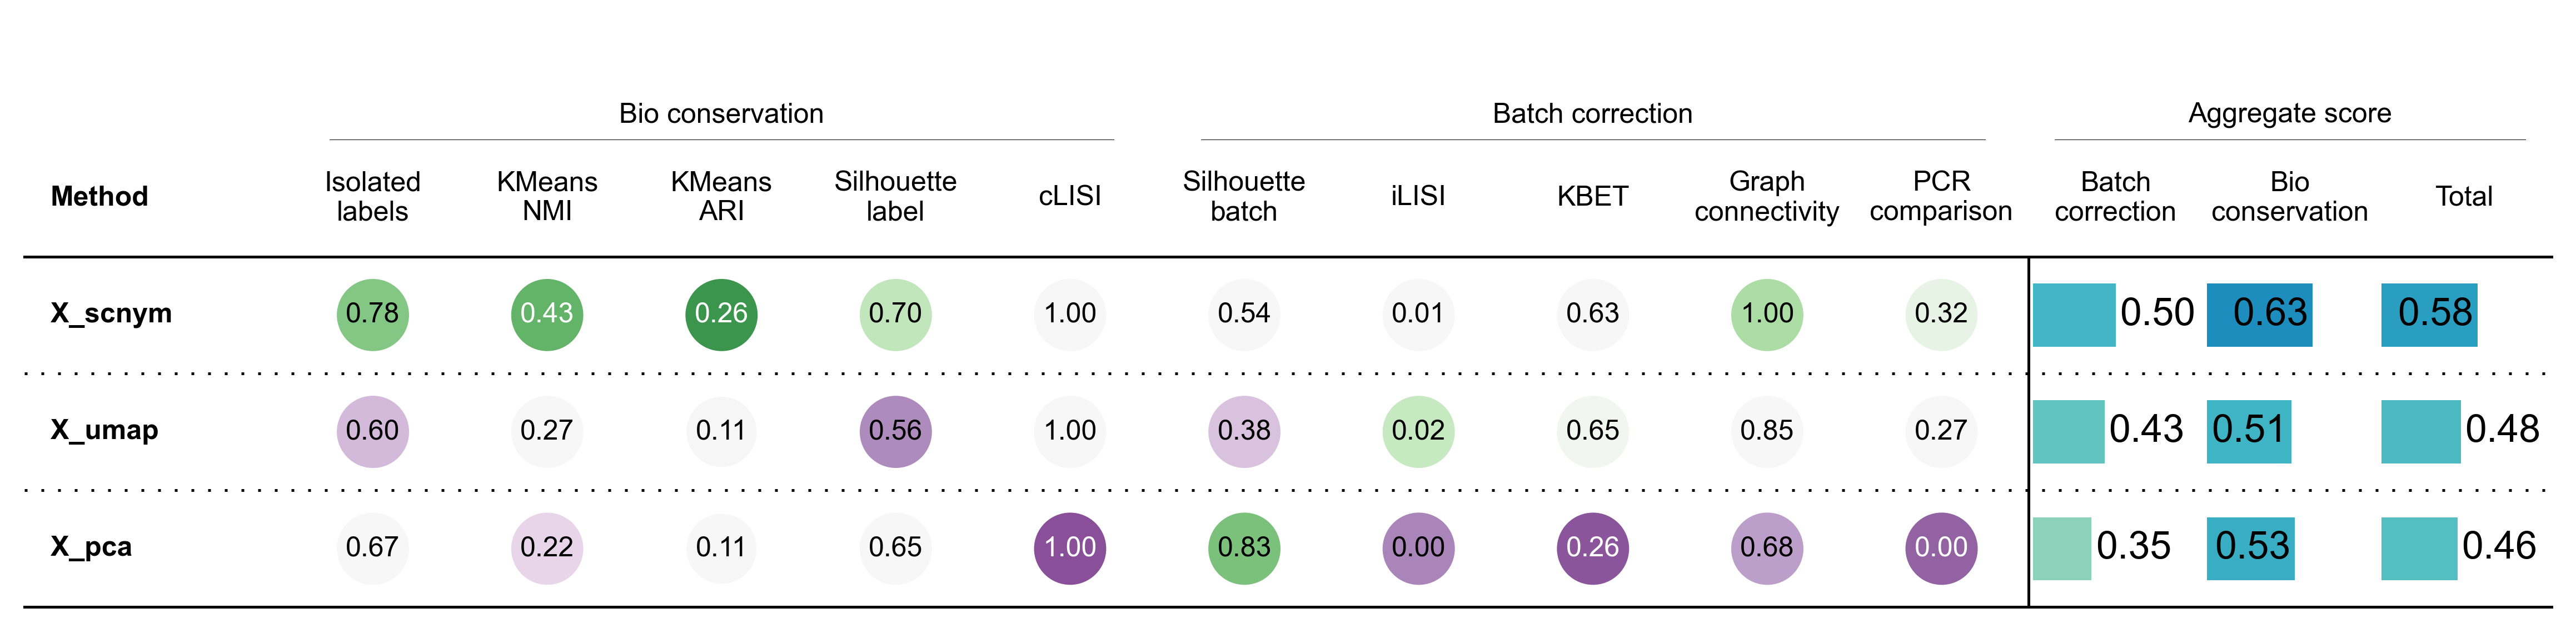

In [20]:
bm.plot_results_table(min_max_scale=False)

#### 5000 HVGs

In [21]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scNYM/scnym_output_5K.h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scNYM/scnym_output_5K_output.h5ad'
adata = sc.read_h5ad(input)

In [22]:
adata

AnnData object with n_obs × n_vars = 31298 × 5000
    obs: 'Cell Type', 'batch', 'Sample_ID', 'Chem', 'Location', 'Donor_ID', 'Layer', 'Cell States Kong', 'Gender', 'Library_Preparation_Protocol', 'Diagnosis', 'Study_name', 'Cell States', 'Age_group', 'seed_labels', 'UniqueCell_ID', 'Age', 'Region code', 'Fraction', 'n_genes_by_counts', 'doublet_scores', 'predicted_doublets', 'total_counts_ribo', 'Cell Label', 'dataset', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'pct_counts_ribo', 'scNym', 'scNym_confidence'
    var: 'gene_id-reference', 'gene_name-reference', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito', 'ribo', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Diagnosis_colors', 'Donor_ID_colors', 'Study_name_colors', 'dataset_colors', 'hvg', 'log1p', 'neighbors', 'scNym_colors', 'scNym_probabilities', 'scNym_train_resul

In [23]:
bm = Benchmarker(
    adata,
    batch_key="Sample_ID",
    label_key="scNym",
    embedding_obsm_keys=["X_pca", 'X_scnym', 'X_umap'],
    n_jobs=-1,
)
bm.benchmark()

computing PCA
    with n_comps=50
    finished (0:00:08)


Embeddings: 100%|██████████| 3/3 [10:30<00:00, 210.07s/it]


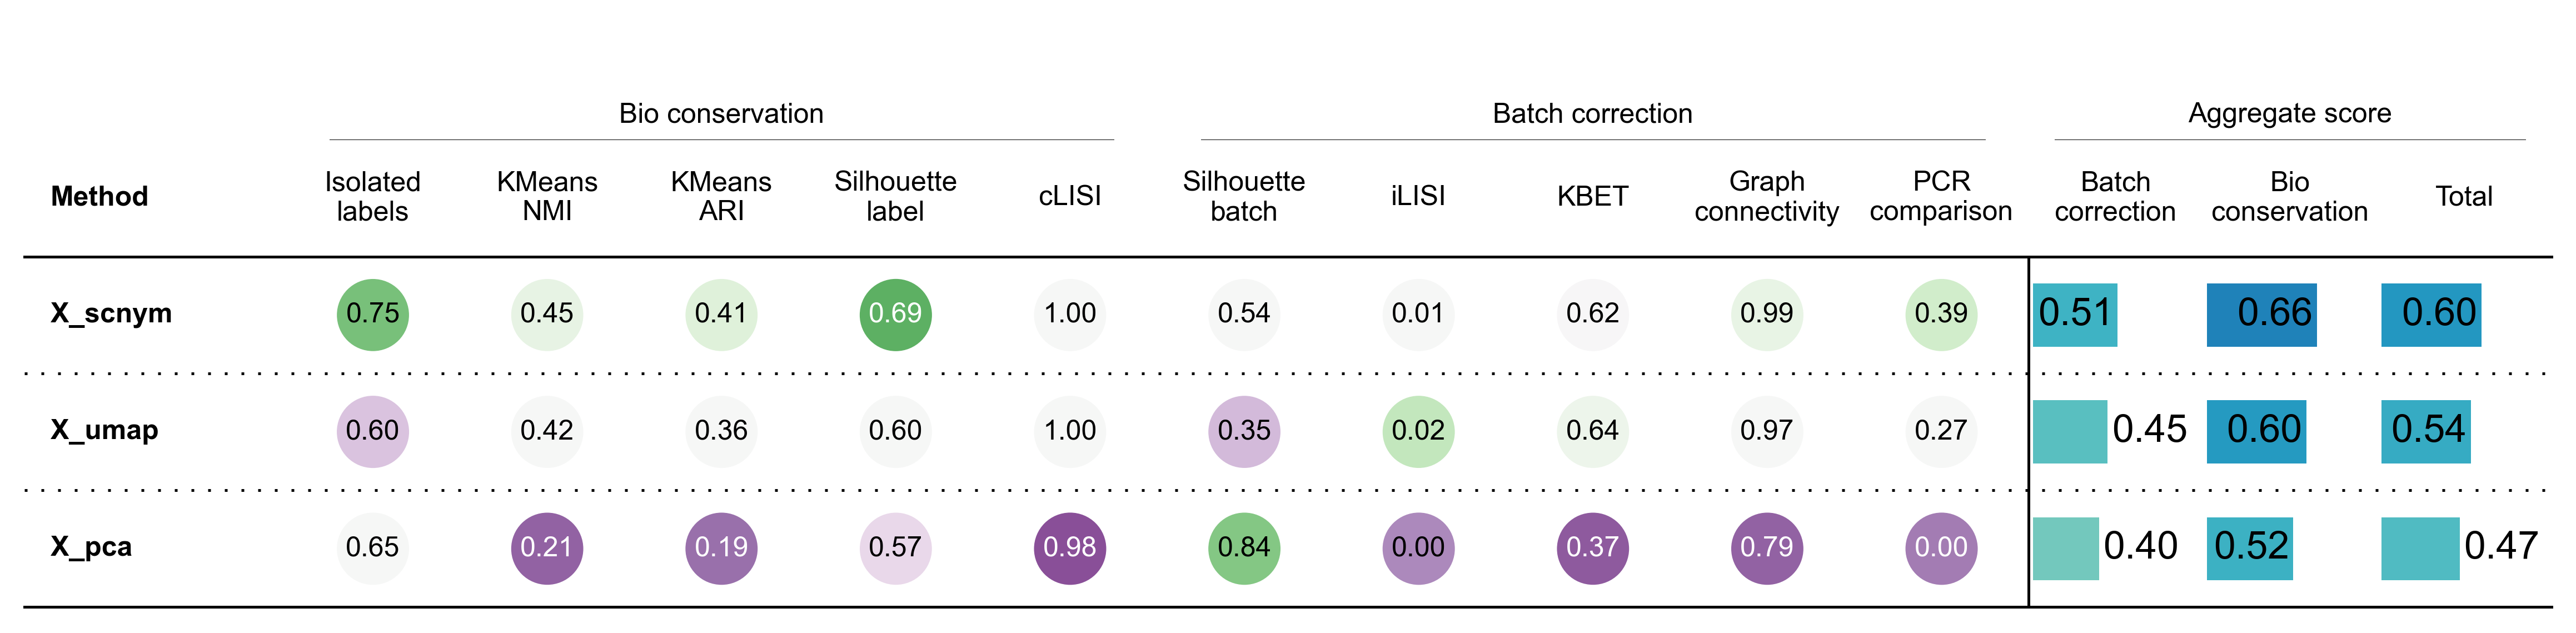

In [25]:
bm.plot_results_table(min_max_scale=False)

#### 7000 HVGs

In [26]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scNYM/scnym_output_7K.h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Stem_cells_diversity/scNYM/scnym_output_7K_output.h5ad'
adata = sc.read_h5ad(input)

In [28]:
bm = Benchmarker(
    adata,
    batch_key="Sample_ID",
    label_key="scNym",
    embedding_obsm_keys=["X_pca", 'X_scnym', 'X_umap'],
    n_jobs=-1,
)
bm.benchmark()

computing PCA
    with n_comps=50
    finished (0:00:10)


Embeddings: 100%|██████████| 3/3 [07:38<00:00, 152.91s/it]


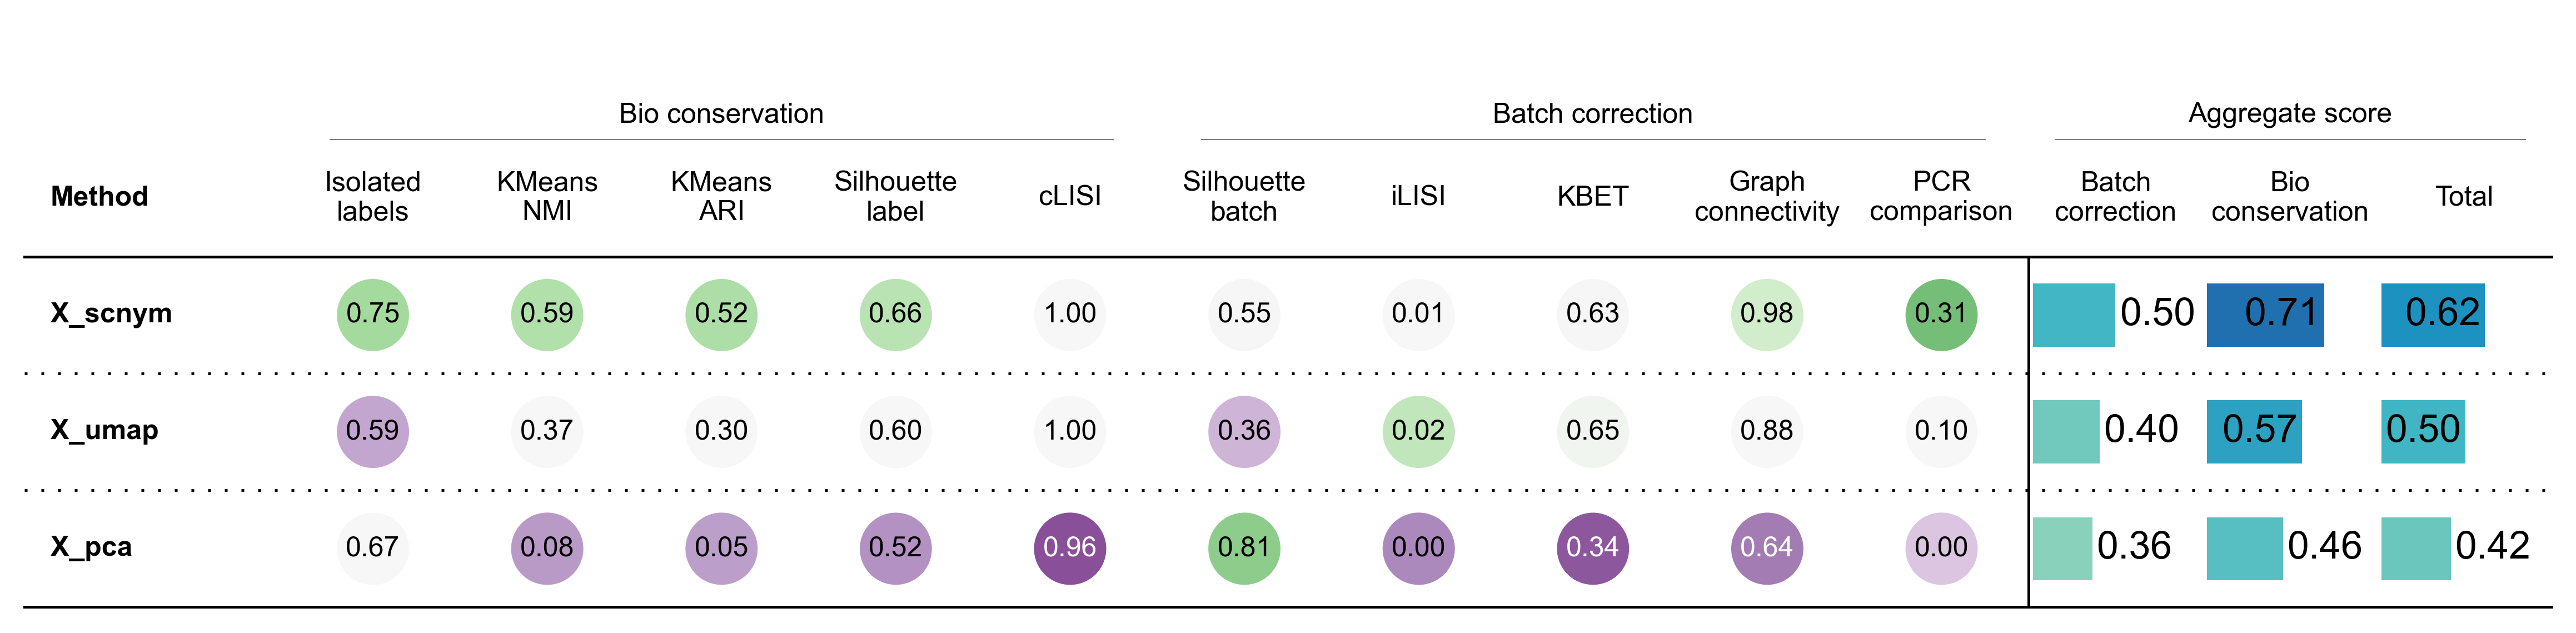

In [29]:
bm.plot_results_table(min_max_scale=False)